In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ds = pd.read_csv("./credit_prediction.csv") #open and read the file using pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  int64  
 1   Age                       90113 non-null   float64
 2   Occupation                89954 non-null   object 
 3   Annual_Income             89811 non-null   float64
 4   Monthly_Inhand_Salary     89881 non-null   float64
 5   Num_Bank_Accounts         89935 non-null   float64
 6   Num_Credit_Card           90131 non-null   float64
 7   Interest_Rate             89999 non-null   float64
 8   Num_of_Loan               90030 non-null   float64
 9   Type_of_Loan              89921 non-null   object 
 10  Delay_from_due_date       90053 non-null   float64
 11  Num_of_Delayed_Payment    89927 non-null   float64
 12  Changed_Credit_Limit      90077 non-null   float64
 13  Num_Credit_Inquiries      89971 non-null   fl

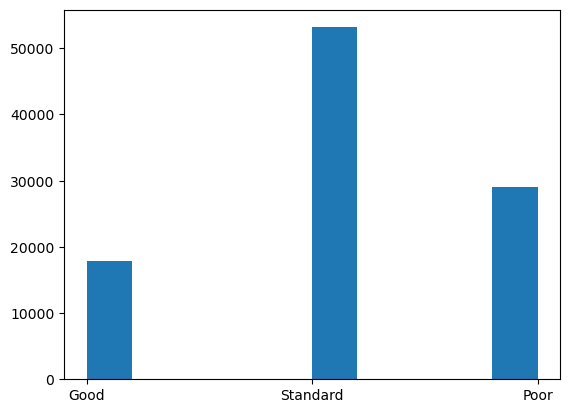

In [5]:
ds.head(10) #show the first 10 elements
correlation = ds.corr() #to see correlations, but all categorical ones will be ignored, so change them

from sklearn.preprocessing import LabelEncoder
ds['Credit_Mix'] = LabelEncoder().fit_transform(ds['Credit_Mix'])
ds['Payment_Behaviour'] = LabelEncoder().fit_transform(ds['Payment_Behaviour'])

ds.head(10)
#again
ds.corr()
description = ds.describe() #statistical summary
ds.info() 

print(pd.value_counts(ds['Credit_Score']))
_ = plt.hist(ds['Credit_Score']) # Assign the result of plt.hist to variable _. This is a common trick to discard unwanted output.
plt.show()

In [6]:
#pre-process
#we can eliminate a priori some columns, as we can consider them as not relevant 
ds = ds.drop(columns=['Occupation', 'Type_of_Loan', 'Credit_History_Age', 'Changed_Credit_Limit', 'Payment_of_Min_Amount'])
#impute missing values
ds = ds.replace(np.nan,00)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  int32  
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [7]:
#collect data into arrays
X = ds.iloc[:, :-1].values      
y = ds.iloc[:, -1].values

Remove outliers

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

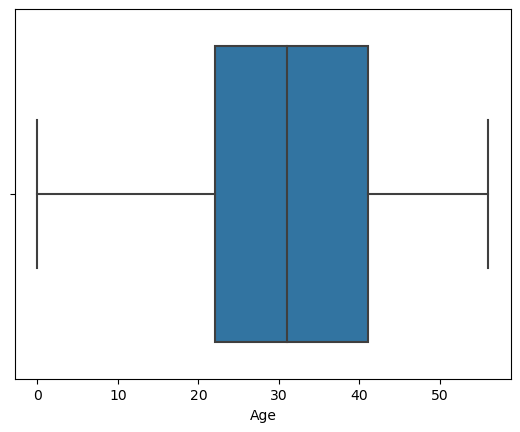

In [8]:
sns.boxplot(ds['Age'])

start the splitting

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

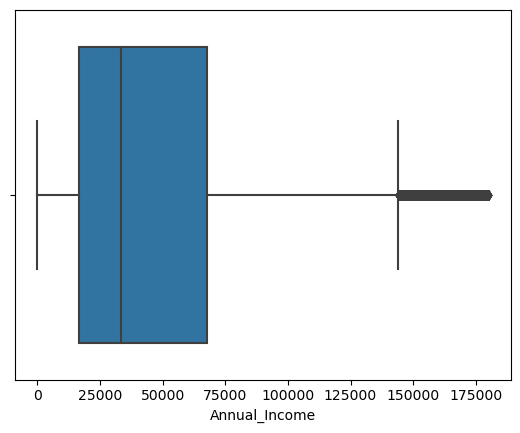

In [9]:
sns.boxplot(ds['Annual_Income'])

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

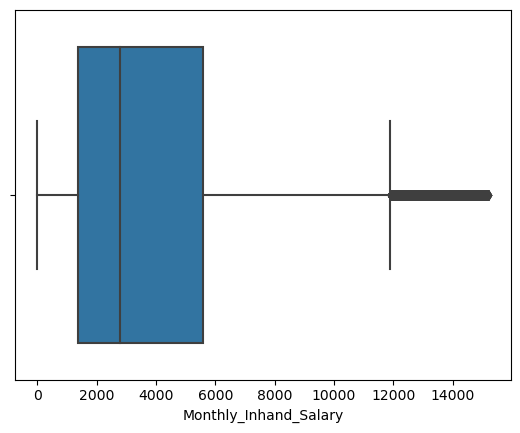

In [10]:
sns.boxplot(ds['Monthly_Inhand_Salary'])

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Bank_Accounts'>

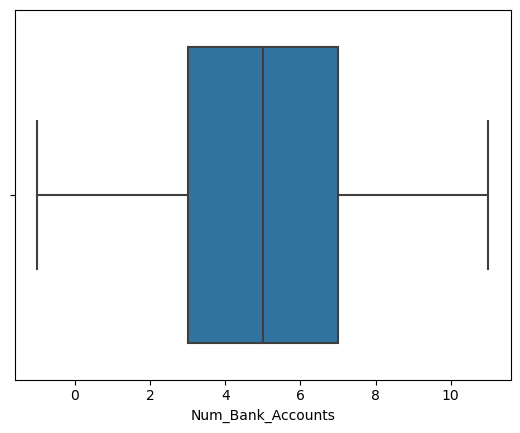

In [11]:
sns.boxplot(ds['Num_Bank_Accounts'])


c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Card'>

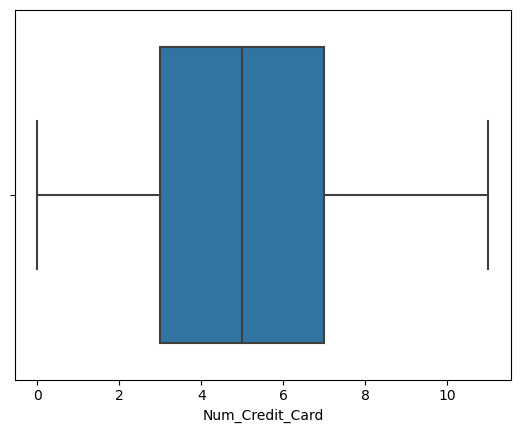

In [12]:
sns.boxplot(ds['Num_Credit_Card'])

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate'>

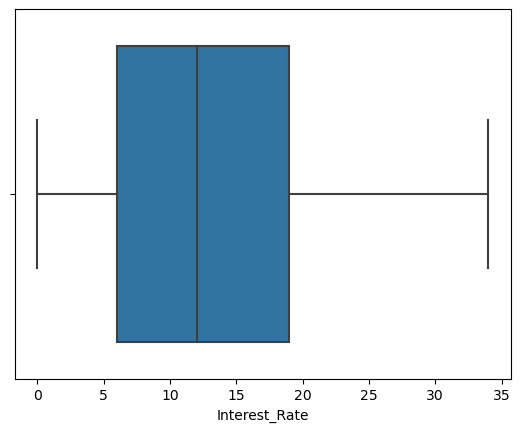

In [13]:
sns.boxplot(ds['Interest_Rate'])

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Loan'>

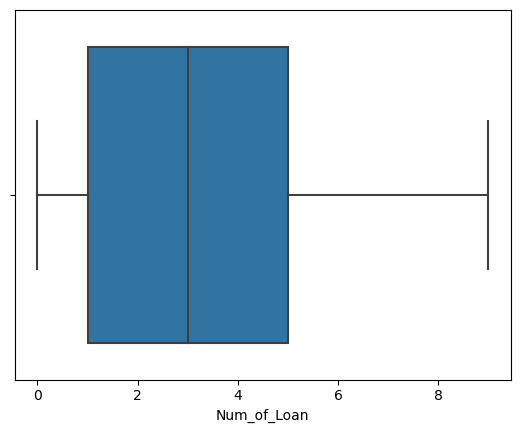

In [14]:
sns.boxplot(ds['Num_of_Loan'])

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delay_from_due_date'>

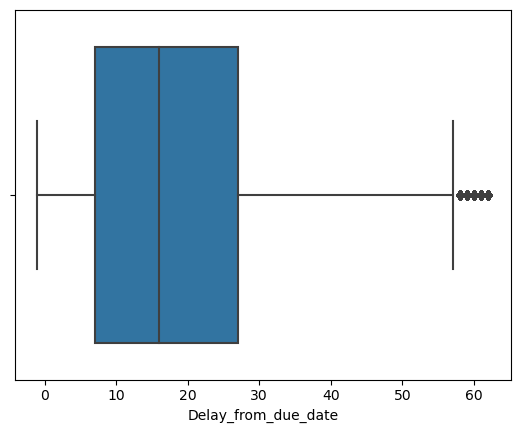

In [15]:
sns.boxplot(ds['Delay_from_due_date'])

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

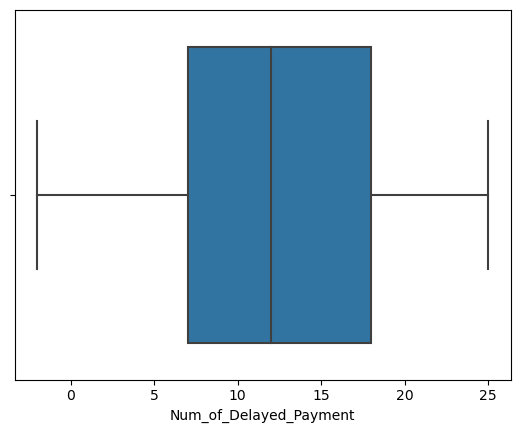

In [16]:
sns.boxplot(ds['Num_of_Delayed_Payment'])


c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Inquiries'>

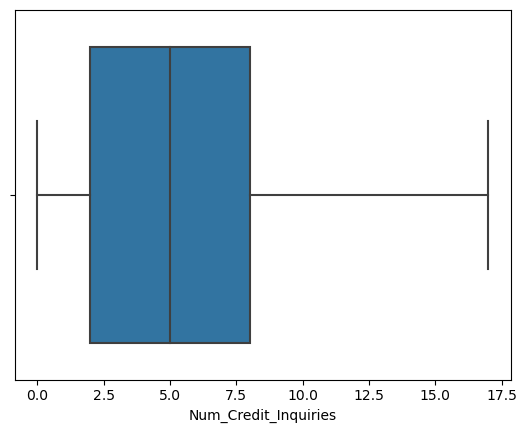

In [17]:
sns.boxplot(ds['Num_Credit_Inquiries'])



c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Mix'>

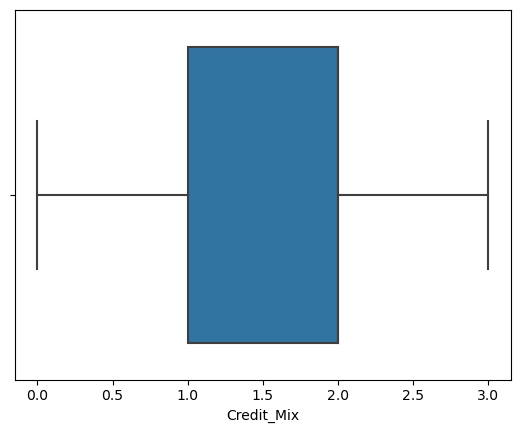

In [18]:
sns.boxplot(ds['Credit_Mix'])


c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outstanding_Debt'>

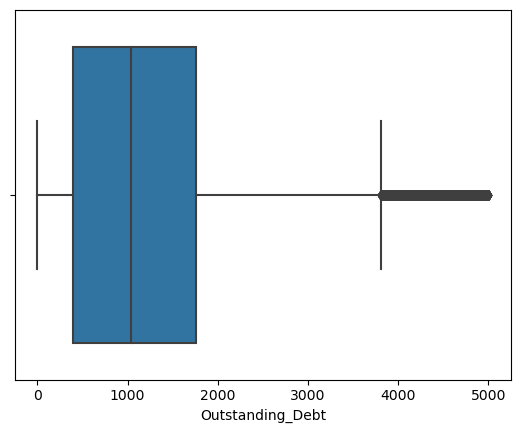

In [19]:
sns.boxplot(ds['Outstanding_Debt'])


c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

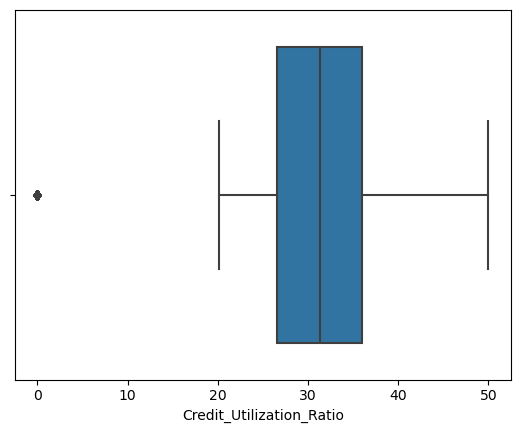

In [20]:
sns.boxplot(ds['Credit_Utilization_Ratio'])


c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount_invested_monthly'>

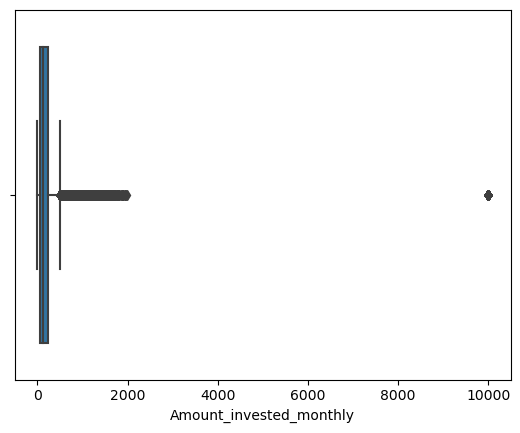

In [21]:
sns.boxplot(ds['Amount_invested_monthly'])


c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment_Behaviour'>

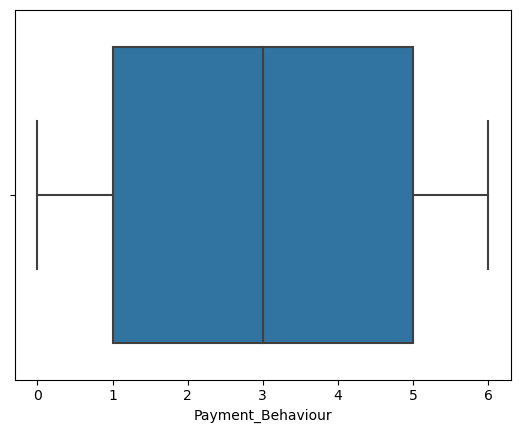

In [22]:
sns.boxplot(ds['Payment_Behaviour'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#encode data. This step is really important, we have already transformed the categorical data into integers. REMEMBER, NEVER TRAIN ON THE TEST SET!!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#validation from the training
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
model = "b"

if model == "SVC":
    #classifier = SVC(kernel = 'linear', random_state = 0)
    param_grid = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1,1, 10, 100]}
    classifier = SVC()
    clf = GridSearchCV(classifier, param_grid)
    clf.fit(X_train,y_train)
elif model=="C":
    classifier = XGBClassifier(use_label_encoder=False) #using XGboost as more efficient 
else :
    k_range = list(range(5, 7))
    param_grid = dict(n_neighbors=k_range)
    knn = neighbors.KNeighborsClassifier()
    # defining parameter range
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
    # fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)

In [ ]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print(scores)




param_grid = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1,1, 10, 100]}
classifier = SVC()
clf = GridSearchCV(classifier, param_grid)
clf.fit(X_train,y_train)
y_pred = clf.best_estimator_.predict(X_test) # this contains the best trained classifier
print(classification_report(y_test, y_pred))